## Cancer Project
### Alina Liviniuk
### Skoltech 2017

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

%matplotlib inline
 
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
data = pd.read_csv(url, dtype=float, na_values='?')

data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Almost all functions have numerical value, some functions ('STDs: Time since first diagnosis', 
'STDs: Time since last diagnosis') have almost no values

# Deleting useless data
Following features contain too many gaps (almost all)

In [2]:
data=data.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis=1)

## Define X (inputs) and y(outputs)

False positive 
    Biopsy 97%
    Cyto 86%    
So, Biopsy result is chosen as target (Biopsy positive result = Canser in MOST cases)

In [3]:
X = list(data)[:-1]
y = list(data)[-1:]

## Fill in missing data

In [4]:
for label in X:
    data[label] = data[label].fillna(data[label].median())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null float64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vagin

In [6]:
# set targets to type integer
data[y] = data[y].astype(int)
data[y].head(5)

,Biopsy
0,0
1,0
2,0
3,0
4,0


In [7]:
data[X].head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data[X].describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.686480,2.035331,0.096737,...,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.464194,3.567040,0.295771,...,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data[y].describe()

,Biopsy
count,858.000000
mean,0.064103
std,0.245078
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Mean << 0.5
So the target data is unbalanced.

In [10]:
data[['STDs:AIDS', 'STDs:cervical condylomatosis']].describe()

,STDs:AIDS,STDs:cervical condylomatosis
count,858.0,858.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [11]:
# Delete those useless features
data = data.drop(['STDs:AIDS', 'STDs:cervical condylomatosis'], axis=1)
X.remove('STDs:AIDS')
X.remove('STDs:cervical condylomatosis')

Now all the data is complit, no nulls left

## Visualization

## Check for correlation

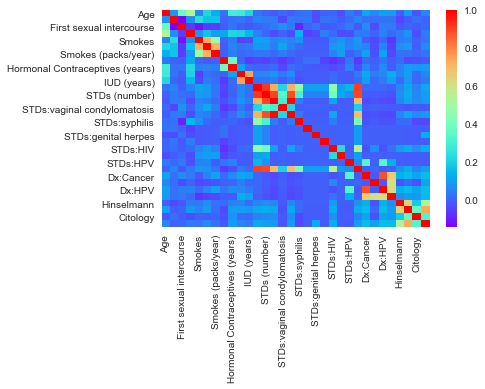

In [12]:
# among features
sns.heatmap(data.corr(), cmap='rainbow')

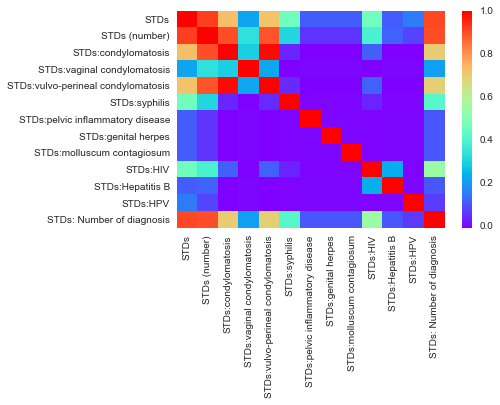

In [13]:
# Look closer to region with more correlation
sns.heatmap(data[list(data)[11:24]].corr(), cmap='rainbow')

Some correlation of high degree is detected. We can drop one of two correlating fields for every pair. 

There is a lot of corr between <br>
1)STDs and STDs (number), <br>
2)STDs (number) and STDs:condylomatosis, <br>
3)STDs:condylomatosis and STDs:vulvo-perineal condylomatosis, <br>
4)STDs (number) and STDs:vulvo-perineal condylomatosis<br>
5)STDs and STDs:Number of diagnosis<br>
6)STDs (number) and STDs:Number of diagnosis<br>

We can drop STDs (number), STDs:vulvo-perineal condylomatosis, STDs:Number of diagnosis

In [14]:
data=data.drop(["STDs (number)", "STDs:vulvo-perineal condylomatosis"], axis=1)
X.remove("STDs (number)")
X.remove("STDs:vulvo-perineal condylomatosis")

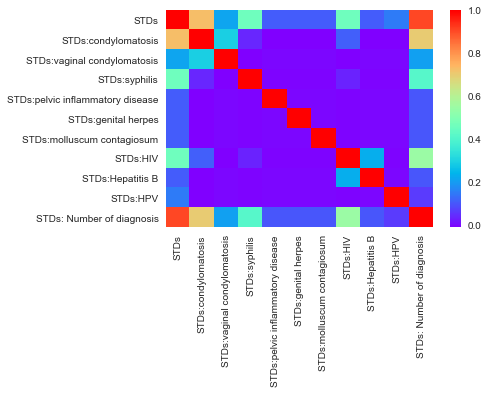

In [15]:
# Now better:
sns.heatmap(data[list(data)[11:22]].corr(), cmap='rainbow')

## Look for some interesting findings

Does Dx:Cancer correlate with age of patience?

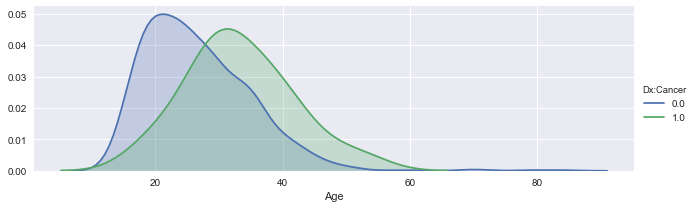

In [16]:
fg = sns.FacetGrid(data, hue="Dx:Cancer", aspect=3)
fg.map(sns.kdeplot, "Age", shade=True).add_legend()
fg.set();

Cancer appears mostly in 30-35 years

How does Hormonal Contraceptives effect on Biopsy results?

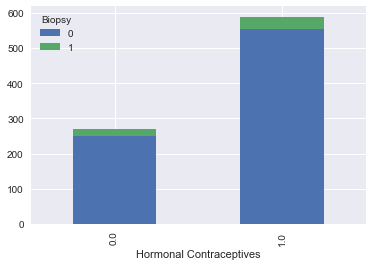

In [17]:
data.pivot_table('Age', 'Hormonal Contraceptives', 'Biopsy', 'count').plot(kind='bar', stacked=True)

There is no strong correletion between Hormonal Contraceptives and Biopsy results

## KNeighborsClassifier

In [18]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#y_true = np.array([0, 0, 1, 1])
#y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#roc_auc_score(y_true, y_scores)

clf_knb = KNeighborsClassifier(n_neighbors=10)

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y[0]], test_size=0.33)
clf_knb.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
y_predicted_train_knb = clf_knb.predict(X_train)
print('Accuracy of prediction on train set is {}'.format(round(np.mean(y_train == y_predicted_train_knb), 5)))

Accuracy of prediction on train set is 0.94948


In [20]:
y_predicted_test_knb = clf_knb.predict(X_test)
print('Accuracy of prediction on test set is {}'.format(round(np.mean(y_test == y_predicted_test_knb), 5)))

Accuracy of prediction on test set is 0.90845


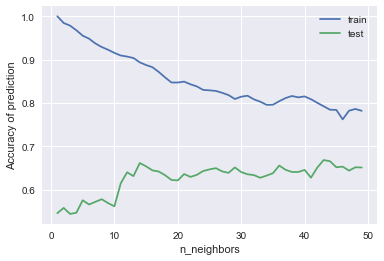

In [21]:
from sklearn.metrics import roc_auc_score
# For choosing n_neighbors
train_error, test_error = [], []
neighbors_range = range(1, 50)
for n_neighbors in neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_error.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
    test_error.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
plt.plot(neighbors_range, train_error, label='train')
plt.plot(neighbors_range, test_error, label='test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy of prediction')
plt.legend()

Best result for roc_auc_score with test data y_test is:

In [22]:
np.max(test_error)

0.66860465116279078

## Comparison of different ML models scores

## Cross-validation

In [23]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
clf_knb.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)
print('roc_auc_score of KN  prediction is {}'.format(round(np.mean(roc_auc_score(y_test,clf_knb.predict_proba(X_test)[:, 1])), 5)))
print('roc_auc_score of LR  prediction is {}'.format(round(np.mean(roc_auc_score(y_test,clf_lr.predict_proba(X_test)[:, 1])), 5)))

roc_auc_score of KN  prediction is 0.56194
roc_auc_score of LR  prediction is 0.94082


## Conclusions
Cervical cancer was predicted during this work  using a set of demographic characteristics and medical tests.

The dataset contained a feature with 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis', which contains a little information. This allowed to drop these columns for better results.

There were four classes of canser tests (Hinselmann, Schiller, Cytology, Biopsy). The Biopsy is the most accurate, so I choose it for target variable.

Visualisation showed, that cancer appears mostly in 30-35 years. And there is no strong correletion between Hormonal Contraceptives and Biopsy results.

A correlations between different variables was found and visualized:
1)STDs and STDs (number), 
2)STDs (number) and STDs:condylomatosis, 
3)STDs:condylomatosis and STDs:vulvo-perineal condylomatosis, (Maybe because condylomatosis contains a huge number of vulvo-perineal condylomatosis)
4)STDs (number) and STDs:vulvo-perineal condylomatosis
5)STDs and STDs:Number of diagnosis
6)STDs (number) and STDs:Number of diagnosis

Three ML models were used, hyperparameters were chosen with GridSearch. The most resultative ML model is LR model. Cross Validation was used for indentifying best model.

K neighbors and Logistic Regression were used.

Logistic Regression has shown better results in terms of roc_auc_score.

For cross-validation roc_auc_score was used, because it workes well with unbalanced data, like our targets.
We have also analised accuracy_score and have seen, that it gives big values. It is because target data is unbalanced. The prediction in this case is almost always right even when recall is zero, or low.